In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pyperclip
from collections import OrderedDict as OD
from pint import UnitRegistry

In [2]:
def CEBFIB(fc, dmax, rho = 2.4E-9):
    ################################################
    # Compressive strength
    # (CEB-FIB Model Code 2010 5.1.4)
    # specific characteristic compressive strength 
    fck     = fc
    # MPa
    delta_f = 8.
    # mean compressive strength
    fcm     = fck + delta_f 
    # biaxial compression strength, MPa
    fbc     = 1.15*fck
    ################################################
    # Tensile strength
    # (CEB-FIB Model Code 2010 5.1.5.1)
    # mean value of tensile strenght for fck <= C50
    if fck <= 50:
        fctm = 0.3*pow(fck,2./3.)
    # mean value of tensile strenght for fck >  C50
    else:
        fctm = 2.12*np.log(1+0.1*(fck+delta_f))
    # lower bounds for characteristic tensile strenght
    fck_min = 0.7*fctm
    # upper bounds for characteristic tensile strenght
    fck_max = 1.3*fctm
    # uniaxial tensile strenght
    ft      = fctm
    # biaxial tensile strength
    fbt     = ft
    # triaxial tensile strength
    ftt     = ft
    ################################################
    # Fracture energy
    # (CEB-FIB Model Code 2010 5.1.5.2)             
    # Gf = 73*pow(fcm,0.18) # fracture energy
    # MPa
    fcm0    = 10.0                                  
    # Base value for fracture energy, Nmm/mm^2
    Gf0     = 0.021+5.357E-4*dmax
    # Fracture energy, Nmm/mm^2
    Gft      = Gf0*pow(fcm/fcm0, 0.7)
    Gfc      = Gft*100
    Gfs      = Gft
    ################################################
    # Elastic poperties 
    # (CEB-FIB Model Code 2010 5.1.7.2)
    # MPa
    Ec0     = 2.15E+4
    # aggregate qualititive values
    alpha_E = 1.0
    # Elacticity modulud at 28 day
    Eci = Ec0*alpha_E*pow((fck+delta_f)/fcm0,1./3.) 
    alpha_i = 0.8+0.2*fcm/88
    if alpha_i > 1.0: 
        alpha_i = 1.0
    # Reduced elasticity modulus 
    Ec  = alpha_i*Eci                               
    E   = Eci
    # Poisson ratio for stresses -0.6*fck < sigma <0.8*fctk
    nu  = 0.15                                       
    # Shear modulus
    G   = E/(2.*(1+nu))                             
    # Bulk modulus
    K   = E/(3.*(1-2.*nu))                          
    ################################################
    # MAT_CONCRETE_DAMAGE_PLASTIC_MODEL stecial data
    # Tensile softening branch for exponential tensile damage formulation
    # WF  = Gf/ft
    # ksi = ft*(fbc**2-fc**2)/(fbc*(fc**2-ft**2))
    # ECC = (1+ksi)/(1-ksi)
    ################################################
    # Record data from CEB-FIB estimations
    data = OD()
    data['fc']   = fc  
    data['fcm']  = fcm 
    data['fcm']  = fcm   
    data['ft']   = ft 
    data['ftt']  = ftt     
    data['fbc']  = fbc 
    data['Gfc']  = Gfc
    data['Gft']  = Gft     
    data['Gfs']  = Gfs     
    data['dmax'] = dmax
    data['rho']  = rho 
    data['nu']   = nu     
    data['E']    = E       
    data['G']    = G       
    data['K']    = K 
    #data['WF']   = WF
    #data['ECC']  = ECC    
    return data


In [3]:
def P(fc, Ap,Bp,Cp):
    return Ap*pow(fc,2)+Bp*fc+Cp

In [4]:
def concPlot(x,
             y1,
             y2,
             lable1='rev 1', 
             label2='rev 2', 
             xLabel='Ox',
             yLabel='Oy',
             fontsize=15, 
             imgSizeYinches=10, 
             imgSizeXinches=15,
             linewidth=2.0,
             xlim_0 = -100,
             xlim_1 = 100,
             ylim_0 = -100,
             ylim_1 = 100,
            ):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    fig.set_size_inches(imgSizeXinches, imgSizeYinches, forward=True)

    ax.plot(x, y1, label = u'rev = 1',color='blue',linewidth=2.0)
    ax.plot(x, y2, label = u'rev = 2',color='red',linewidth=2.0)

    ax.grid(True)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    
    ax.set_xlim([xlim_0,xlim_1])
    ax.set_ylim([ylim_0,ylim_1])
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    for label in ax.xaxis.get_ticklabels(): label.set_fontsize(fontsize)
    for label in ax.yaxis.get_ticklabels(): label.set_fontsize(fontsize)

    plt.legend(loc='upper left',prop={'size':fontsize+4})
    plt.xlabel(xLabel).set_fontsize(fontsize+4)
    plt.ylabel(yLabel).set_fontsize(fontsize+4)
    plt.show()
    return 

The yield surface is formulated in terms of three stress invariants because an isotropic material has three independent stress invariants. The model uses $J_{1}$ — the first invariant of the stress tensor, $J′_{2}$ — the second invariant of the deviatoric stress tensor, and $J′_{3}$ — the third invariant of the deviatoric stress tensor
The invariants are defined in terms of the deviatoric stress tensor, $S_{ij}$ and pressure, $P$ as shown in Figure 17. 

$$J_{1}=3P$$
$$J'_{2}=\frac{1}{2}S_{ij}S_{ij}$$
$$J'_{3}=\frac{1}{3}S_{ij}S_{jk}S_{ki}$$ 
Figure 17. Equation. Stress invariant $J_{1}$ , $J′_{2}$, and $J′_{3}$


The three invariant yield function is based on these three invariants, and the cap hardening parameter, $\kappa$, as shown in Figure 18:
$$
f(J_{1},J'_{2},J'_{3},\kappa)=J'_{2}-\mathfrak{R}^2F^2_{f}F_{c}
$$
Figure 18. Equation. Yield function $f$.

Here $F_{f}$ is the shear failure surface, $F_{c}$ is the hardening cap, and $\mathfrak{R}$ is the Rubin three-invariant reduction factor. Multiplying the cap ellipse function by the shear surface function allows the cap and shear surfaces to take on the same slope at their intersection, as discussed in subsequent paragraphs.

# Parameters for the compressive meridian (TXC)

In [5]:
def alpha(fc,rev=1):
    if rev   == 1: return P(fc, -0.003, 0.3169747, 7.7047)
    elif rev == 2: return 13.9846*np.exp(fc/68.8756)-13.8981
    else: return False 

In [6]:
def lamda(fc,rev=1):
    if   rev == 1: return P(fc, 0.0, 0.0, 10.5)
    elif rev == 2: return 3.6657*np.exp(fc/39.9363)-4.7092
    else: return False 

In [7]:
def beta(fc,rev=1):
    if rev   == 1: return P(fc, 0.0, 0.0, 1.929E-02)
    elif rev == 2: return 18.17791*pow(fc,-1.7163)
    else: return False 

In [8]:
def theta(fc,rev=1):
    if   rev == 1: return P(fc, 1.3216E-05, 2.3548E-03, 0.2140058)
    elif rev == 2: return 0.3533-3.3294E-4*fc-3.8182E-6*pow(fc,2)
    else: return False 

In [9]:
def TXC(fc, J, rev):
    return alpha(fc,rev)-lamda(fc,rev)*np.exp(-beta(fc,rev)*J)+theta(fc,rev)*J

# Parameters for the compressive meridian in TOR

In [10]:
def alpha1(fc,rev=1):
    if rev   == 1: return P(fc, 0, 0, 0.74735)
    elif rev == 2: return 0.82
    else: return False 

In [11]:
def lamda1(fc,rev=1):
    if   rev == 1: return P(fc, 0, 0, 0.17)
    elif rev == 2: return 0.26
    else: return False 

In [12]:
def beta1(fc,rev=1):
    if rev   == 1: return P(fc, -1.9972e-05, 2.2655e-04, 8.1748e-02)
    elif rev == 2: return 0.285*pow(fc,-0.94843)
    else: return False 

In [13]:
def theta1(fc,rev=1):
    if   rev == 1: return P(fc, -4.0856E-07, -1.2132E-06, 1.5593E-03)
    elif rev == 2: return 0
    else: return False 

In [14]:
def Q1(fc, J, rev=1): 
    return alpha1(fc,rev)-lamda1(fc,rev)*np.exp(-beta1(fc,rev)*J)+theta1(fc,rev)*J

In [15]:
def TOR(fc, J, rev=1):
    return Q1(fc,J,rev)*TXC(fc,J,rev)

# Parameters for TXE

In [16]:
def alpha2(fc,rev=1):
    if rev   == 1: return P(fc, 0, 0, 0.66)
    elif rev == 2: return 0.76
    else: return False 

In [17]:
def lamda2(fc,rev=1):
    if   rev == 1: return P(fc, 0, 0, 0.16)
    elif rev == 2: return 0.26
    else: return False 

In [18]:
def beta2(fc,rev=1):
    if rev   == 1: return P(fc, -1.9972e-05, 2.2655e-04, 8.2748e-02)
    elif rev == 2: return 0.285*pow(fc,-0.94843)
    else: return False 

In [19]:
def theta2(fc,rev=1):
    if   rev == 1: return P(fc, -4.8697e-07, -1.8883e-06, 1.8822e-03)
    elif rev == 2: return 0
    else: return False 

In [20]:
def Q2(fc, J, rev=1):
    return alpha2(fc,rev)-lamda2(fc,rev)*np.exp(-beta2(fc,rev)*J)+theta2(fc,rev)*J

In [21]:
def TXE(fc, J, rev=1):
    return Q2(fc,J,rev)*TXC(fc,J,rev)

# CAP

In [22]:
def X0(fc,rev=1):
    if rev   == 1: return P(fc, 8.769178e-03, -7.3302306e-02, 84.85)
    elif rev == 2: return 17.087+1.892*fc
    else: return False 

In [23]:
def R(fc,rev=1):
    if rev   == 1: return 5
    elif rev == 2: return 4.45994*np.exp(-fc/11.51679)+1.95358
    else: return False 

In [24]:
def W(fc,rev=1):
    if rev   == 1: return 0.05
    elif rev == 2: return 0.065
    else: return False 

In [25]:
def D1(fc,rev=1):
    if rev   == 1: return 2.5E-4
    elif rev == 2: return 6.11e-4
    else: return False 

In [26]:
def D2(fc,rev=1):
    if rev   == 1: return 3.49E-7
    elif rev == 2: return 2.225E-6
    else: return False 

In [27]:
def plasticVolumetricStrain(fc,X,rev=1):
    return W(fc,rev)*(1-np.exp(-D1(fc,rev)*(X-X0(fc,rev))-D2(fc,rev)*pow(X-X0(fc,rev),2)))

In [28]:
def hydrostaticCompressionParameters(fc,X,rev=1):
    return D1(fc,rev)*(X-X0(fc,rev))+D2(fc,rev)*pow(X-X0(fc,rev),2)

# Damage

In [29]:
def B(fc,rev=1):
    if rev   == 1: return 100
    elif rev == 2: return False ######
    else: return False 

In [30]:
def D(fc,rev=1):
    if rev   == 1: return 0.1
    elif rev == 2: return False #####
    else: return False 

# Strain rate

In [31]:
def eta_t(fc,rev=1): 
    if rev   == 1: return 0.48
    elif rev == 2: return 0
    else: return False 

In [32]:
def eta_0_t(fc,rev=1): 
    fc_in_psi= fc*145.0377
    if rev   == 1: return P(fc_in_psi, 8.0614774E-13, -9.77736719E-10, 5.0752351E-05)
    elif rev == 2: return 0
    else: return False 

In [33]:
def eta_c(fc,rev=1): 
    if rev   == 1: return 0.78
    elif rev == 2: return 0
    else: return False 

In [34]:
def eta_0_c(fc,rev=1):
    fc_in_psi= fc*145.0377
    if rev   == 1: return P(fc_in_psi, 1.2772337E-11, -1.0613722E-07, 3.203497E-4)
    elif rev == 2: return 0
    else: return False

In [35]:
def overt(fc,rev=1): 
    return P(fc, 1.309663E-02, -0.3927659, 21.45)    

In [36]:
def overc(fc,rev=1): 
    return overt(fc,rev=1)

# Plot and check

## Smooth transition between the tensile and compressive pressure regions
This is accomplished by setting:
$$\alpha_{1} – \lambda_{1} = 0.5774$$ 

$$Q_{1}\Bigr|_{P=0} = 0.5774$$ 

In [37]:
fc=40
J=0 
print "alpha1(rev=1)-lamda1(rev=1) = {0}".format(alpha1(fc,rev=1)-lamda1(fc,rev=1))
print "alpha1(rev=2)-lamda1(rev=2) = {0}".format(alpha1(fc,rev=2)-lamda1(fc,rev=2))

print "Q1(P=0, rev=1) = {0}".format(Q1(fc,J,1))
print "Q1(P=0, rev=2) = {0}".format(Q1(fc,J,2))

alpha1(rev=1)-lamda1(rev=1) = 0.57735
alpha1(rev=2)-lamda1(rev=2) = 0.56
Q1(P=0, rev=1) = 0.57735
Q1(P=0, rev=2) = 0.56


$$\alpha_{2} – \lambda_{2} = 0.5$$

$$Q_{2}\Bigr|_{P=0} = 0.5$$

In [38]:
print "alpha2(rev=1)-lamda2(rev=1) = {0}".format(alpha2(fc,rev=1)-lamda2(fc,rev=1))
print "alpha2(rev=2)-lamda2(rev=2) = {0}".format(alpha2(fc,rev=2)-lamda2(fc,rev=2))

print "Q2(P=0, rev=1) = {0}".format(Q2(40,0,1))
print "Q2(P=0, rev=2) = {0}".format(Q2(40,0,2))

alpha2(rev=1)-lamda2(rev=1) = 0.5
alpha2(rev=2)-lamda2(rev=2) = 0.5
Q2(P=0, rev=1) = 0.5
Q2(P=0, rev=2) = 0.5


In [39]:
#Q1 Mhor-Coulomb fit 
def Q1MC(fc, rev=1):
    return np.sqrt(3)*Q2(fc,rev)/(1+Q2(fc, rev))

In [40]:
#Q2 Mhor-Coulomb fit 
def Q2MC(fc, rev=1):
    return TXE(fc, rev=1)/TXC(fc, rev=1)

## Willam-Warnke fit
$$
Q_{1}=\frac{\sqrt{3}(1-Q^2_{2})+(2Q_{2}-1)\sqrt{3(1-Q^2_{2})+5Q^2_{2}-4Q_{2}}}{3(1-Q^2_{2})+(1-2Q_{2})^2}
$$

In [41]:
#Q2 Willam-Warnke fit
def Q1WW(fc, rev=1):
    q=(1-pow(Q2(fc, rev),2))
    return (np.sqrt(3)*q+(2*Q2(fc, rev)-1)*np.sqrt((3*q)+5*pow(Q2(fc, rev),2)-4*Q2(fc, rev)))/(3*q+pow(1-2*Q2(fc, rev),2))

In [42]:
def TORMC(fc, J, rev=1):
    return Q1MC(fc,J,rev)*TXC(fc,J,rev)

In [43]:
def TXEMC(fc, rev=1):
    return Q2MC(fc,J,rev)*TXC(fc,J,rev)

In [44]:
def TORWW(fc, J, rev=1):
    return Q1WW(fc,J,rev)*TXC(fc,J,rev)

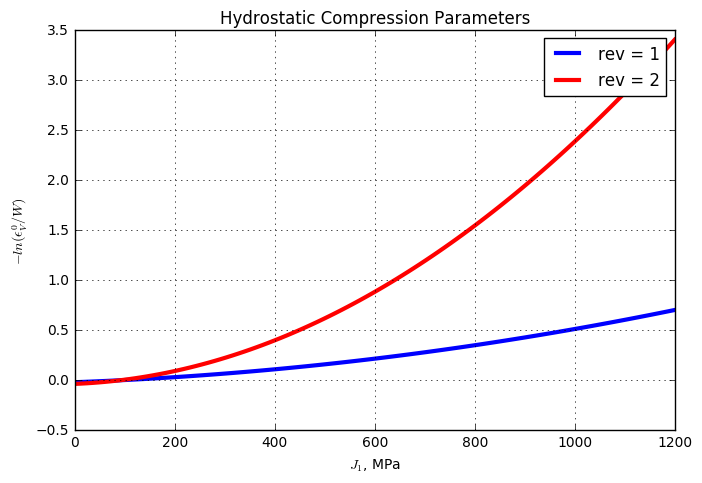

In [45]:
fc = 40 

X = np.linspace(0, 1200, 100) 
plotHCP = plt.figure() 
plotHCP.add_axes([0, 0, 1, 1])
plt.title('Hydrostatic Compression Parameters')
plt.plot(X,hydrostaticCompressionParameters(fc,X,rev=1),label = u'rev = 1',color='blue',linewidth=3.0)
plt.plot(X,hydrostaticCompressionParameters(fc,X,rev=2),label = u'rev = 2',color='red',linewidth=3.0)
plt.xlabel('$J_{1}$, MPa')
plt.ylabel('$-ln(\epsilon^0_{V}/W)$')
plt.grid(True)
plt.legend()  
plt.show()

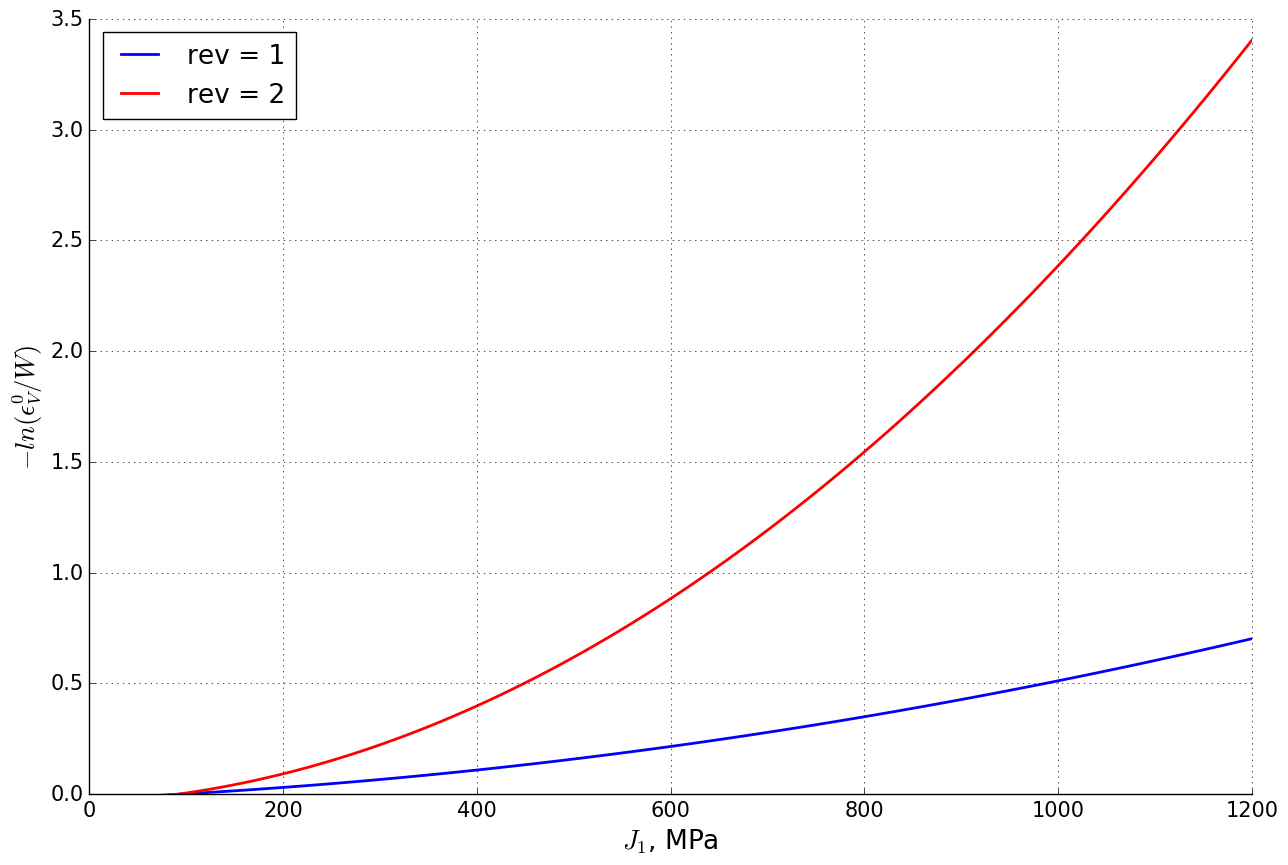

In [46]:
fc = 40 

xMin = 0
xMax = 1200
x = np.linspace(xMin, xMax, 100) 
y1 = hydrostaticCompressionParameters(fc,x,rev=1)
y2 = hydrostaticCompressionParameters(fc,x,rev=2)

concPlot(x,
         y1,
         y2, 
         xLabel = '$J_{1}$, MPa', 
         yLabel = '$-ln(\epsilon^0_{V}/W)$',
         xlim_0 = xMin, 
         xlim_1 = xMax,
         ylim_0 = 0, 
         ylim_1 = 3.5
        )

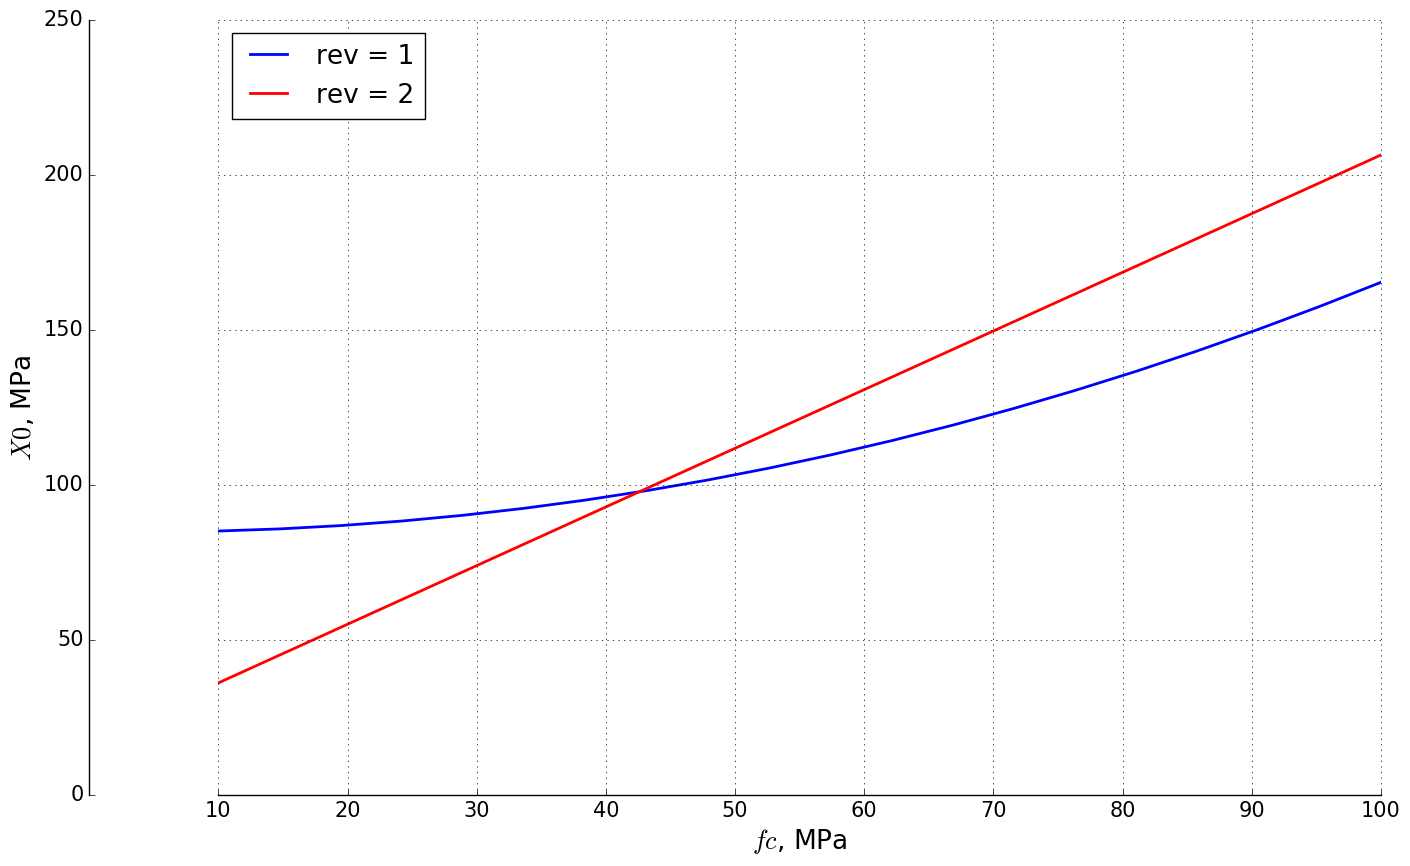

In [47]:
xMin = 10
xMax = 100

fc = np.linspace(10, 100, 20)
concPlot(fc,
         X0(fc,rev=1),
         X0(fc,rev=2), 
         xLabel = '$fc$, MPa', 
         yLabel = '$X0$, MPa',
         xlim_0 = xMin, 
         xlim_1 = xMax,
         ylim_0 = 0, 
         ylim_1 = 250
        )

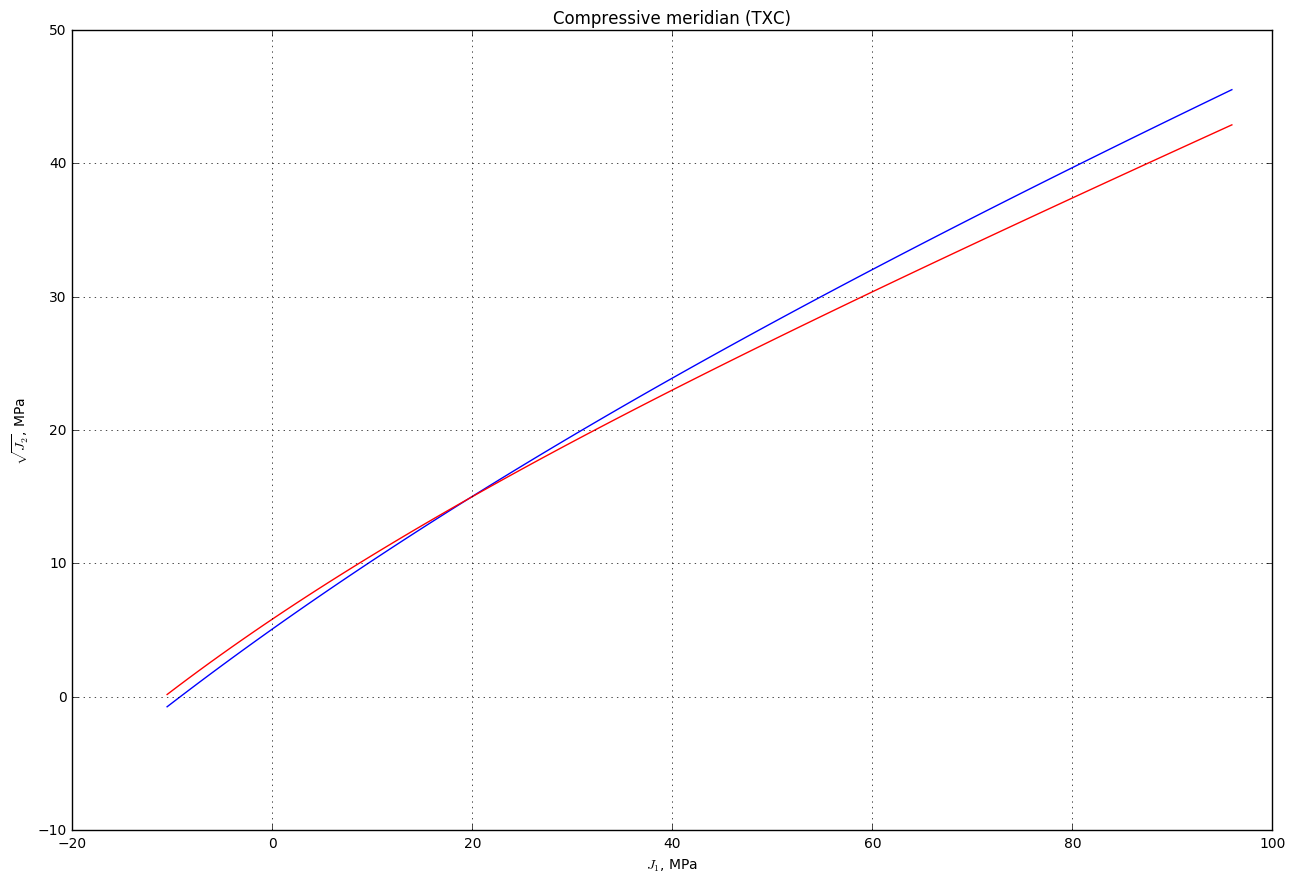

In [48]:
fc = 40 

J = np.linspace(-3*CEBFIB(fc, dmax=10)['ftt'], X0(fc, rev=1), 100) 
plotTXC = plt.figure() 
plotTXC.add_axes([0, 0, 2, 2])
plt.title('Compressive meridian (TXC)')
plt.plot(J, TXC(fc,J,rev=1),  color='blue')
plt.plot(J, TXC(fc,J,rev=2),  color='red')
plt.xlabel('$J_{1}$, MPa')
plt.ylabel('$\sqrt{J_{2}}$, MPa')
plt.grid(True)
plt.show()

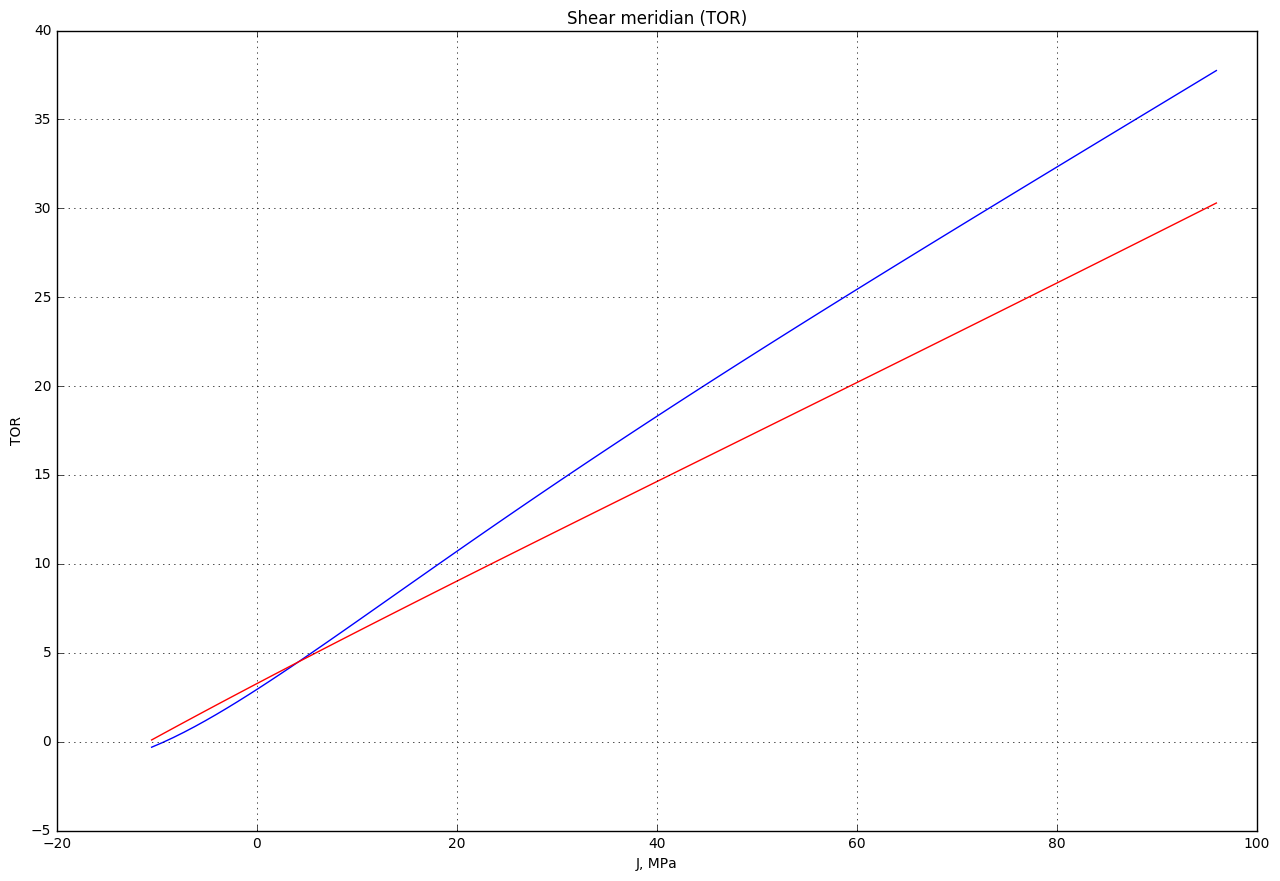

In [49]:
J = np.linspace(-3*CEBFIB(fc, dmax=10)['ftt'], X0(fc, rev=1), 100) 
plotTOR = plt.figure() 
plotTOR.add_axes([0, 0, 2, 2])
plt.title('Shear meridian (TOR)')
plt.plot(J, TOR(fc,J,rev=1),  color='blue')
plt.plot(J, TOR(fc,J,rev=2),  color='red')
plt.xlabel('J, MPa')
plt.ylabel('TOR')
plt.grid(True)
plt.show()

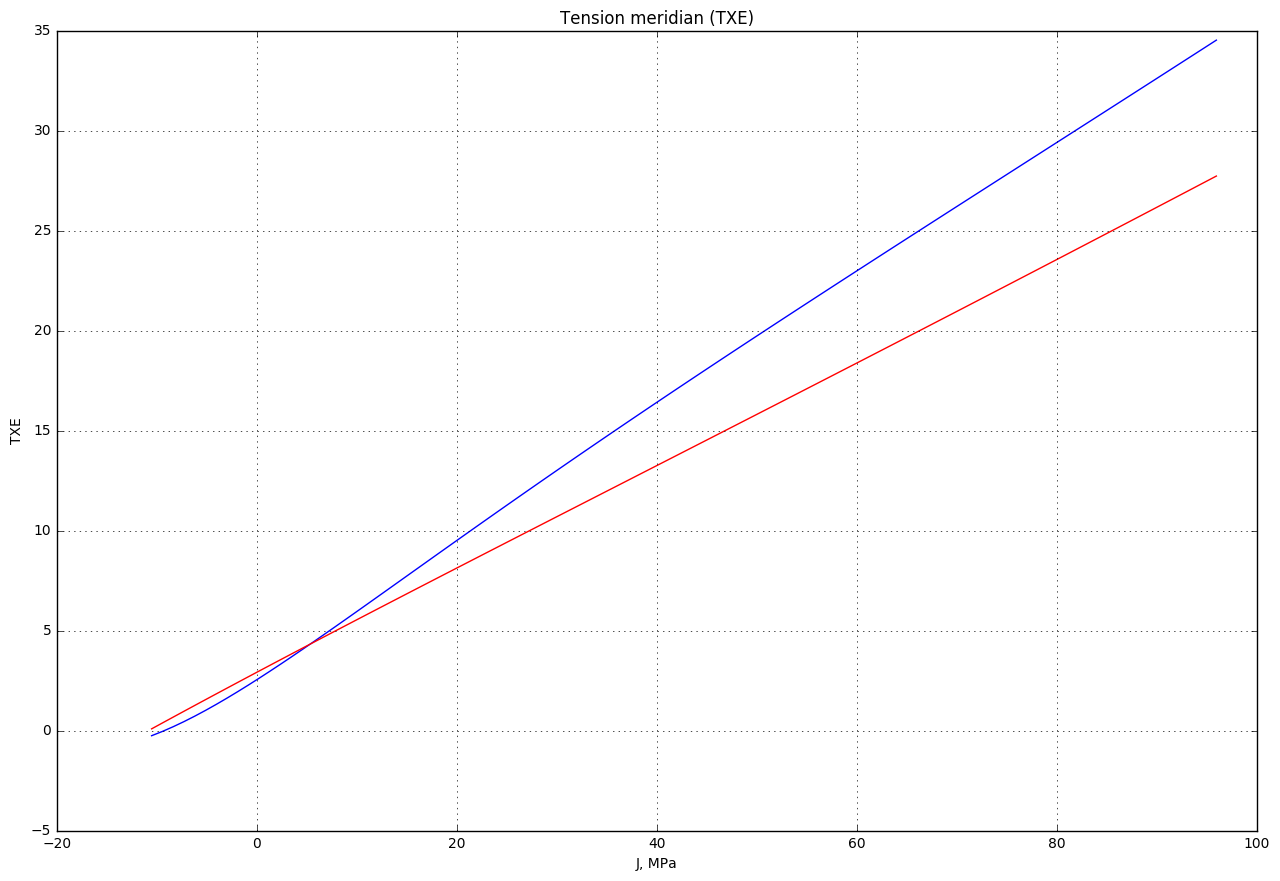

In [50]:
J = np.linspace(-3*CEBFIB(fc, dmax=10)['ftt'], X0(fc, rev=1), 100) 
plotTXE = plt.figure() 
plotTXE.add_axes([0, 0, 2, 2])
plt.title('Tension meridian (TXE)')
plt.plot(J, TXE(fc,J,rev=1),  color='blue')
plt.plot(J, TXE(fc,J,rev=2),  color='red')
plt.xlabel('J, MPa')
plt.ylabel('TXE')
plt.grid(True)
plt.show()

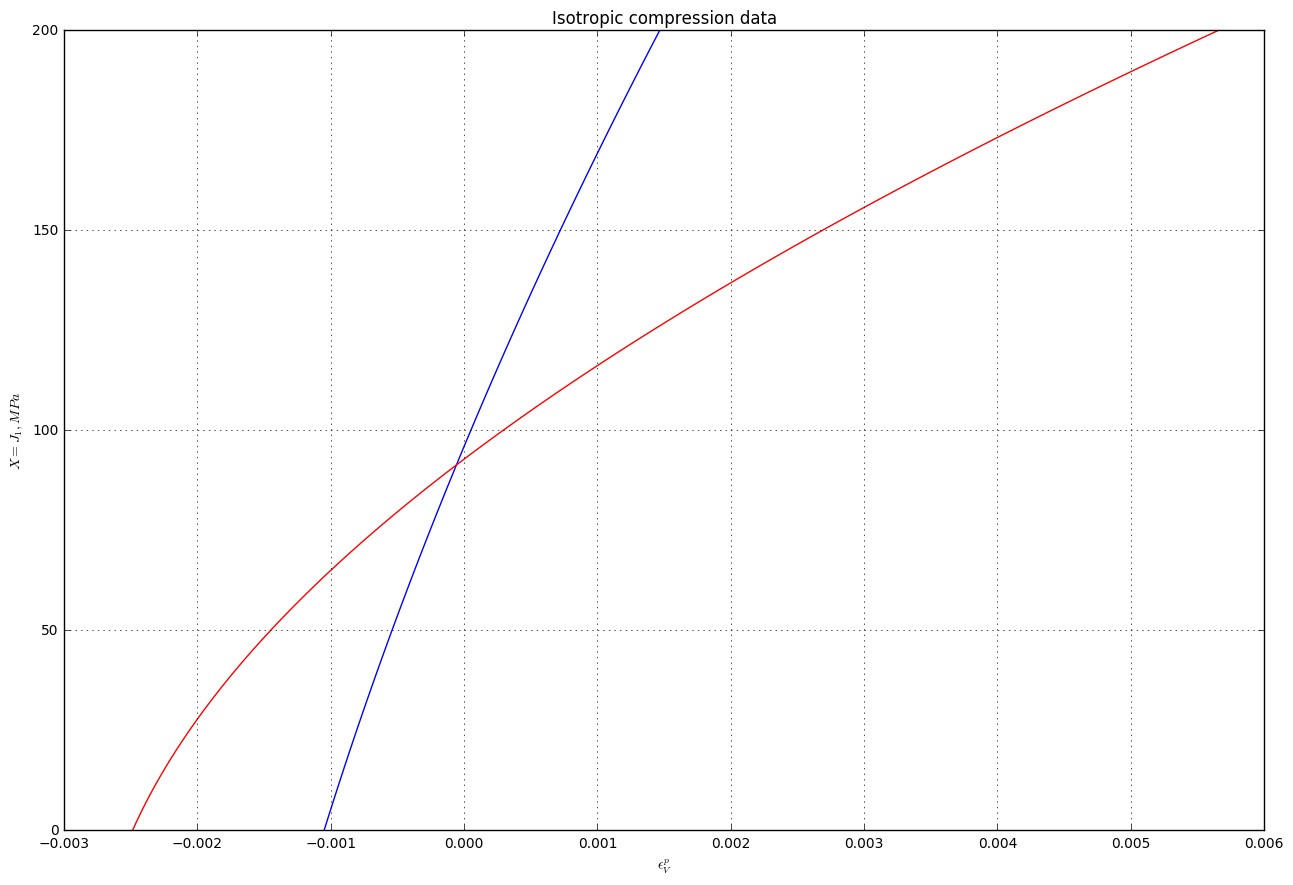

In [51]:
fc = 40

X = np.linspace(0, 200, 100) 
plotX = plt.figure() 
plotX.add_axes([0, 0, 2, 2])
plt.title('Isotropic compression data')
plt.plot(plasticVolumetricStrain(fc,X,rev=1), X,  color='blue')
plt.plot(plasticVolumetricStrain(fc,X,rev=2), X,  color='red')
plt.xlabel('$\epsilon^p_{V}$')
plt.ylabel('$X = J_{1}, MPa$')
plt.grid(True)
plt.show()


# Keyword output

In [52]:
def printCEBFIP(fc, dmax, rho = 2.4E-9):
    items = CEBFIB(fc, dmax,rho)
    text  = '$#\n'
    text += '$# CEBFIP Estimations:\n'
    for key in items:
        text += '$# {0} = {1:G}\n'.format(key,items[key])
    text += '$#\n'
    return text

In [53]:
def CSCM(
    concreteClass = 30, 
    dmax    = 19, 
    mid     = 159,   
    rho     = 2.4E-9, 
    nplot   = 1,    # maximum of brittle and ductile damage 
    incre   = 0,    # maximum strain increment for subincrementation.
    irate   = 'on', # rate effects model turned on
    erode   = 'off', 
    recov   = 'full',    # the modulus is recovered in compression when RECOV is equal to 0
    itretrc = 0,    # cap does not retract 
    pred    = 'off',    # preexisting damage 
    srate   = 1,    # ratio of effective shear stress to tensile stress fluidity parameters
    repow   = 1,    # power that increases fracture energy with rate effects
    nh      = 0,    # hardening initiation
    ch      = 0,    # hardening rate
    pwrc    = 5,    # shear-to-compression transition parameter
    pwrt    = 1,    # shear-to-tension transition parameter
    pmod    = 0,    # modify moderate pressure softening parameter
    rev = 1
    ):
    #
    if irate == 'on': irate = 1
    elif irate == 'off': irate = 0
    else: print 'Error in ireate'
    #
    if erode == 'off': erode = 0.99
    else: erode = 1+ float(erode)
    #
    if pred == 'off': pred = 0
    else: pred = float(pred)
    #
    if recov == 'full': recov = 0
    else: recov = 1-float(recov)
    #
    data = CEBFIB(concreteClass,dmax)
    CSCM = OD()
    CSCM['NAME']    = '*MAT_CSCM'
    #
    CSCM['MID']     = {'card':1, 'position':1, 'type':'A8', 'value':mid}
    CSCM['RHO']     = {'card':1, 'position':2, 'type':'F',  'value':rho}
    CSCM['NPLOT']   = {'card':1, 'position':3, 'type':'I',  'value':nplot}
    CSCM['INCRE']   = {'card':1, 'position':4, 'type':'F',  'value':incre}
    CSCM['IRATE']   = {'card':1, 'position':5, 'type':'I',  'value':irate}
    CSCM['ERODE']   = {'card':1, 'position':6, 'type':'F',  'value':erode}
    CSCM['RECOV']   = {'card':1, 'position':7, 'type':'F',  'value':recov}
    CSCM['ITRETRC'] = {'card':1, 'position':8, 'type':'I',  'value':itretrc}
    #   
    CSCM['PRED']    = {'card':2, 'position':1, 'type':'F',  'value':pred}
    #
    CSCM['G']       = {'card':3, 'position':1, 'type':'F',  'value':data['G']}
    CSCM['K']       = {'card':3, 'position':2, 'type':'F',  'value':data['K']}
    CSCM['ALPHA']   = {'card':3, 'position':3, 'type':'F',  'value':alpha(data['fc'],rev)}
    CSCM['THETA']   = {'card':3, 'position':4, 'type':'F',  'value':theta(data['fc'],rev)}
    CSCM['LAMBDA']  = {'card':3, 'position':5, 'type':'F',  'value':lamda(data['fc'],rev)}
    CSCM['BETA']    = {'card':3, 'position':6, 'type':'F',  'value': beta(data['fc'],rev)}
    CSCM['NH']      = {'card':3, 'position':7, 'type':'F',  'value':nh}
    CSCM['CH']      = {'card':3, 'position':8, 'type':'F',  'value':ch}
    #
    CSCM['ALPHA1']  = {'card':4, 'position':1, 'type':'F',  'value':alpha1(data['fc'],rev)}
    CSCM['THETA1']  = {'card':4, 'position':2, 'type':'F',  'value':theta1(data['fc'],rev)}
    CSCM['LAMBDA1'] = {'card':4, 'position':3, 'type':'F',  'value':lamda1(data['fc'],rev)}
    CSCM['BETA1']   = {'card':4, 'position':4, 'type':'F',  'value': beta2(data['fc'],rev)}
    CSCM['ALPHA2']  = {'card':4, 'position':5, 'type':'F',  'value':alpha2(data['fc'],rev)}
    CSCM['THETA2']  = {'card':4, 'position':6, 'type':'F',  'value':theta2(data['fc'],rev)}
    CSCM['LAMBDA2'] = {'card':4, 'position':7, 'type':'F',  'value':lamda2(data['fc'],rev)}
    CSCM['BETA2']   = {'card':4, 'position':8, 'type':'F',  'value': beta2(data['fc'],rev)}
    #
    CSCM['R']       = {'card':5, 'position':1, 'type':'F',  'value': R(data['fc'],rev)}
    CSCM['X0']      = {'card':5, 'position':2, 'type':'F',  'value':X0(data['fc'],rev)}
    CSCM['W']       = {'card':5, 'position':3, 'type':'F',  'value': W(data['fc'],rev)}
    CSCM['D1']      = {'card':5, 'position':4, 'type':'F',  'value':D1(data['fc'],rev)}
    CSCM['D2']      = {'card':5, 'position':5, 'type':'F',  'value':D2(data['fc'],rev)}
    #
    CSCM['B']       = {'card':6, 'position':1, 'type':'F',  'value':B(data['fc'],1)}
    CSCM['GFC']     = {'card':6, 'position':2, 'type':'F',  'value':data['Gfc']}
    CSCM['D']       = {'card':6, 'position':3, 'type':'F',  'value':D(data['fc'],1)}
    CSCM['GFT']     = {'card':6, 'position':4, 'type':'F',  'value':data['Gft']}
    CSCM['GFS']     = {'card':6, 'position':5, 'type':'F',  'value':data['Gfs']}
    CSCM['PWRC']    = {'card':6, 'position':6, 'type':'F',  'value':pwrc}
    CSCM['PWRT']    = {'card':6, 'position':7, 'type':'F',  'value':pwrt}
    CSCM['PMOD']    = {'card':6, 'position':8, 'type':'F',  'value':pmod}
    #
    CSCM['ETA_0_C'] = {'card':7, 'position':1, 'type':'F',  'value':eta_0_c(data['fc'],rev)}
    CSCM['ETA_C']   = {'card':7, 'position':2, 'type':'F',  'value':  eta_c(data['fc'],rev)}
    CSCM['ETA_0_T'] = {'card':7, 'position':3, 'type':'F',  'value':eta_0_t(data['fc'],rev)}
    CSCM['ETA_T']   = {'card':7, 'position':4, 'type':'F',  'value':  eta_t(data['fc'],rev)}
    CSCM['OVERC']   = {'card':7, 'position':5, 'type':'F',  'value':  overc(data['fc'],rev)}
    CSCM['OVERT']   = {'card':7, 'position':6, 'type':'F',  'value':  overt(data['fc'],rev)}
    CSCM['SRATE']   = {'card':7, 'position':7, 'type':'F',  'value':srate}
    CSCM['REPOW']   = {'card':7, 'position':8, 'type':'F',  'value':repow}  
    return CSCM

In [54]:
def keyword2text(
    data,             # ordered dict with card data to be processed
    wordLength  = 10, # word lenght in case of dp keyword
    wordNumber  = 8   # word number in card line
    ): 
    emptyCard   = ' '*wordLength*wordNumber
    cardCount   = 0
    planeText = ''
    items = data.keys()[1:]
    keywordText = [data['NAME']]
    for key in items:
        if data[key]['card']>cardCount:
            cardCount = data[key]['card']
            keywordText.append('')
            keywordText.append('')
        if data[key]['position'] == 1: 
            keywordText[2*cardCount-1] += '$#{0: >{1}s}'.format(key,wordLength-2)
        else:                          
            keywordText[2*cardCount-1] +=  ' {0: >{1}s}'.format(key,wordLength-1)
        if data[key]['value'] == 'AUTO':
            keywordText[2*cardCount]   +=   '{0}'.format(' '*wordLength)
        else:
            if data[key]['type']   == 'A8': 
                keywordText[2*cardCount]+=   ' {0:>{1}s}'.format(  str(data[key]['value']),wordLength-1)
            elif data[key]['type'] == 'I':  
                keywordText[2*cardCount]+=   ' {0:>{1}d}'.format(  int(data[key]['value']),wordLength-1)
            elif data[key]['type'] == 'F':  
                keywordText[2*cardCount]+=' {0:{1}.{2}G}'.format(float(data[key]['value']),wordLength-1,wordLength-6)
            else:                           
                keywordText[2*cardCount]+=          '{0}'.format(' '*wordLength)                     
    for lines in keywordText: planeText+=lines+'\n'
    return planeText

In [55]:
fc = 50.0
dmax = 16.0
rho  = 2.4E-9
rev  = 2
card = keyword2text(CSCM(fc,dmax,irate='on',erode='off', pred='off', recov = 'full', rev=rev)) + printCEBFIP(fc, dmax, rho )

print card
pyperclip.copy(card)

*MAT_CSCM
$#     MID       RHO     NPLOT     INCRE     IRATE     ERODE     RECOV   ITRETRC
       159   2.4E-09         1         0         1      0.99         0         0
$#    PRED
         0
$#       G         K     ALPHA     THETA    LAMBDA      BETA        NH        CH
  1.68E+04 1.839E+04        15    0.3271     8.111   0.02206         0         0
$#  ALPHA1    THETA1   LAMBDA1     BETA1    ALPHA2    THETA2   LAMBDA2     BETA2
      0.82         0      0.26  0.006974      0.76         0      0.26  0.006974
$#       R        X0         W        D1        D2
     2.012     111.7     0.065  0.000611 2.225E-06
$#       B       GFC         D       GFT       GFS      PWRC      PWRT      PMOD
       100     10.12       0.1    0.1012    0.1012         5         1         0
$# ETA_0_C     ETA_C   ETA_0_T     ETA_T     OVERC     OVERT     SRATE     REPOW
         0         0         0         0     34.55     34.55         1         1
$#
$# CEBFIP Estimations:
$# fc = 50
$# fcm = 58
$# ft =